In [ ]:
!pip install -q qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator


In [7]:
def build_toffoli_variant(u3_params_A, u3_params_B, draw_circuit=False):
    """
    Args:
        u3_params_A (tuple): A tuple (theta, phi, lambda) for the first U3 gate.
        u3_params_B (tuple): A tuple (theta, phi, lambda) for the second U3 gate.
        draw_circuit (bool): If True, prints the circuit diagram.

    Returns:
        QuantumCircuit: The constructed Qiskit circuit object.
    """

    qc = QuantumCircuit(3)
    qc.name = "Toffoli Variant"

    qc.t(0)
    qc.u(u3_params_A[0], u3_params_A[1], u3_params_A[2], 2)

    qc.cx(0, 1)
    qc.tdg(1)
    qc.cx(0, 1)
    qc.t(1)

    qc.cx(1, 2)
    qc.tdg(2)
    qc.cx(0, 2)
    qc.t(2)
    qc.cx(1, 2)

    qc.u(u3_params_B[0], u3_params_B[1], u3_params_B[2], 2)

    qc.cx(0, 2)
    qc.t(2)
    qc.h(2)

    if draw_circuit:
        print(qc.draw())

    return qc

In [8]:
placeholder_circuit = build_toffoli_variant((0,0,0), (0,0,0), draw_circuit=True)

        ┌───┐                                                                 »
q_0: ───┤ T ├──────■───────────■─────────────────────■────────────────────────»
        └───┘    ┌─┴─┐┌─────┐┌─┴─┐┌───┐              │                        »
q_1: ────────────┤ X ├┤ Tdg ├┤ X ├┤ T ├──■───────────┼─────────■──────────────»
     ┌──────────┐└───┘└─────┘└───┘└───┘┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌──────────┐»
q_2: ┤ U(0,0,0) ├──────────────────────┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ U(0,0,0) ├»
     └──────────┘                      └───┘└─────┘└───┘└───┘└───┘└──────────┘»
«                    
«q_0: ──■────────────
«       │            
«q_1: ──┼────────────
«     ┌─┴─┐┌───┐┌───┐
«q_2: ┤ X ├┤ T ├┤ H ├
«     └───┘└───┘└───┘


## Approach to find the parameters

We analyze circuit behaviour on different computational basis states

### Case 1 q[0], q[1] = $|0\rangle , |0\rangle$
- All the CNOT gates are deactivated, hence they act as identities
- Combined Operation should be Identitiy for 3rd qubit by definition

\begin{align}
&I = HTU_BTT^†U_A \\
\implies &I = HTU_BU_A \\
\implies &T^†H = U_BU_A \\
\end{align}

The trivial solution is $U_A = H$ and $U_B = T^†$

\begin{align}
\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \begin{bmatrix} cos(\theta_1/2) & -e^{i\lambda_1}sin(\theta_1/2) \\ e^{i\phi_1}sin(\theta_1/2) & e^{i(\lambda_1 + \phi_1)}cos(\theta_1/2) \end{bmatrix}
\end{align}

This gives $(\theta_1, \phi_1, \lambda_1) = (\pi/4, 0, \pi)$

\begin{align}
\begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{bmatrix} = \begin{bmatrix} cos(\theta_2/2) & -e^{i\lambda_2}sin(\theta_2/2) \\ e^{i\phi_2}sin(\theta_2/2) & e^{i(\lambda_2 + \phi_2)}cos(\theta_2/2) \end{bmatrix}
\end{align}

This gives $\theta_2 = 0$ and $\phi_2 + \lambda_2 = -\pi/4$

In [11]:
params_A = (np.pi/4, 0, np.pi)
params_B = (0, 0, -np.pi/4)

In [12]:
solved_circuit = build_toffoli_variant(params_A, params_B)
solved_op = Operator(solved_circuit)
ccx_circuit = QuantumCircuit(3)
ccx_circuit.ccx(0, 1, 2)
ccx_op = Operator(ccx_circuit)
are_equivalent = solved_op.equiv(ccx_op)

In [14]:
solved_op

Operator([[ 0.92387953+1.96261557e-17j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
           -0.38268343+6.11360788e-18j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.92387953+3.92523115e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j, -0.38268343+7.85046229e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.92387953+1.96261557e-17j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
           -0.38268343-1.96261557e-17j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.38268343+3.92523115e-17j,
            0.        +0.000000

In [15]:
ccx_op

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


The Output is not exactly Toffoli Gate, but a good approximate. When I attempted to solve for a generalized solution, it resulted in a system of four non-linear equations with 6 variables which were not solvable. After that, I searched for Gate Tomographies of the Toffoli Gate, and found the following which is very similar to the question, but the ordering of the gates is slightly different. The inaccuracies might be due to these misorderings. But the ordering does not impact the output target qubit, but only impacts the ouptut of the control qubits.

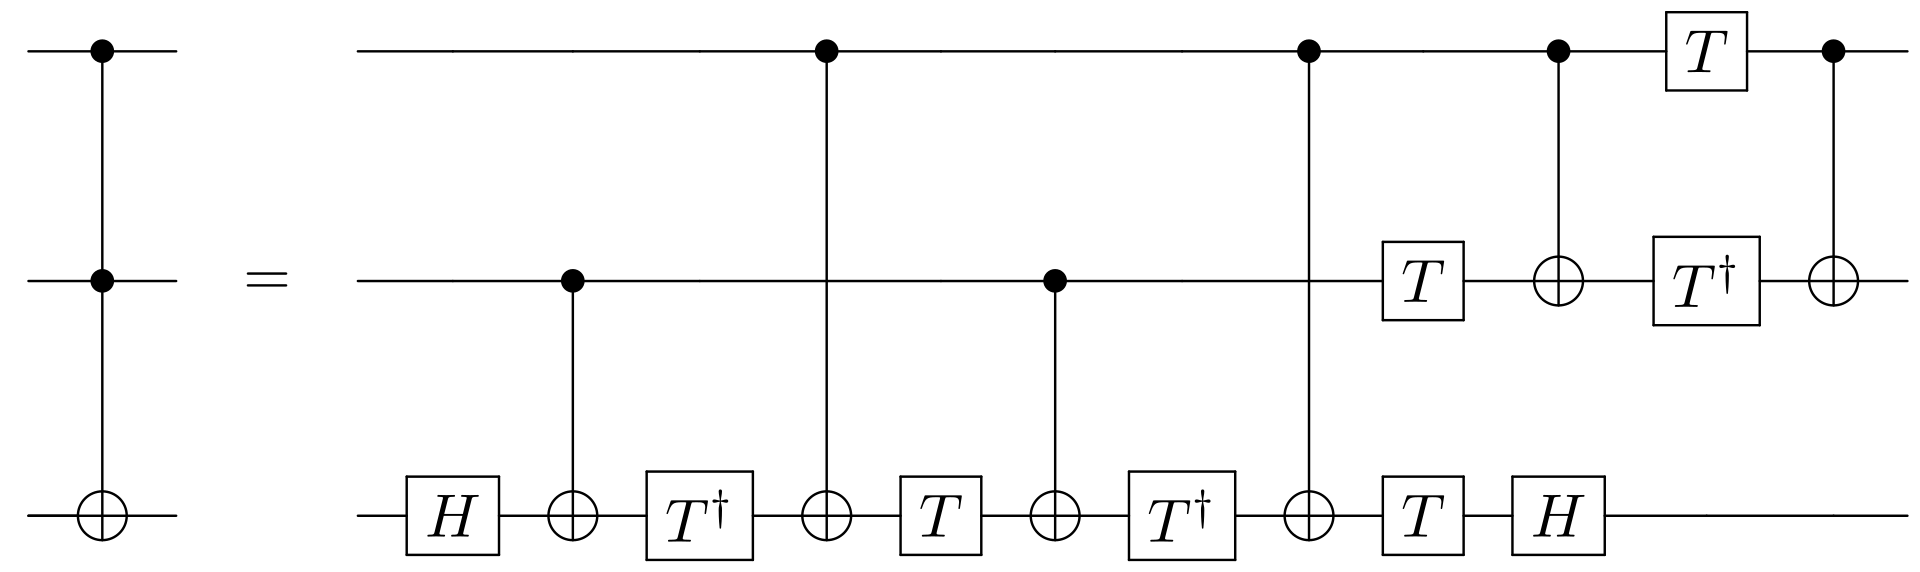![Toffoli_Circuit_Tomography.png](\)